# Chapter 7 Moving Beyond Linearity

## 7.1 Polynomials and Step Functions

### R1
Which of the following can we add to linear models to capture non-linear effects?
1. Spline terms
2. Polynomial terms
3. Interactions
4. Arbitrary linear combinations of variables
5. Step Functions

Answer: 1, 2, 3, and 5  
If we add any of these terms to our linear model, the model will be able to capture new nonlinear effects. The only exceptions is linear combinations of variables already in the model: any linear combination of those variables is already included in the model.

## 7.2 Piecewise Polynomials and Splines

### R1
Why are natural cubic splines typically preferred over global polynomials of degree $d$?
1. Polynomials have too many degrees of freedom.
2. Polynomials tend to extrapolate very badly.
3. Polynomials are not as continuous as splines.

Answer: 2  
Polynomials can oscillate wildly once they get outside the boundaries of the data set. Natural splines, on the other hand, always extrapolate linearly.

### R2
Let $1\{x \le t\}$ denote a function which is 1 if $x \le t$ and 0 otherwise.  
Which of the following is a basis for linear splines with a knot at $t$? Select all that apply:
1. 1, $x$, $(x - t)1\{x > t \}$
2. 1, $x$, $(x - t)1\{x \le t \}$
3. 1, $x$, $1\{x > t \}$, $1\{x \le t \}$, $(x - t)1\{x > t \}$
4. 1, $(x - t)1\{x \le t \}$, $(x - t)1\{x > t \}$

Answer: 1, 2, 4  
Every function in the basis must be continuous at $t$, and we must be able to represent any piecewise linear function with a single knot at $t$ as a linear combination of the functions in the basis.

## 7.3 Smoothing Splines

### R1
In terms of model complexity, which is more similar to a smoothing spline with 100 knots and 5 effective degrees of freedom?
1. A natural cubic spline with 5 knots.
2. A natural cubic spline with 100 knots.

Answer: 1  
Even though the smoothing spline has 100 knots, it is penalized to be smooth, so it is about as complex as a model with 5 variables. The natural cubic spline has 5 degrees of freedom in such a model.

## 7.4 Generalized Additive Models and Local Regression

### R1
True or False: In the GAM $y ~ f_1(X_1) + f_2(X_2) + e$, as we make $f_1$ and $f_2$ more and more complex we can approximate any regression function to arbitrary precision.

Answer: False  
If there is an interaction between $X_1$ and $X_2$, a purely additive model can never capture it.

## 7.R Nonlinear Functions in R

### R1
Load the data from the file 7.R.Rdata, and plot it using `plot(x, y)`. What is the slope coefficient in a linear regression of $y$ on $x$ (to within 10%).

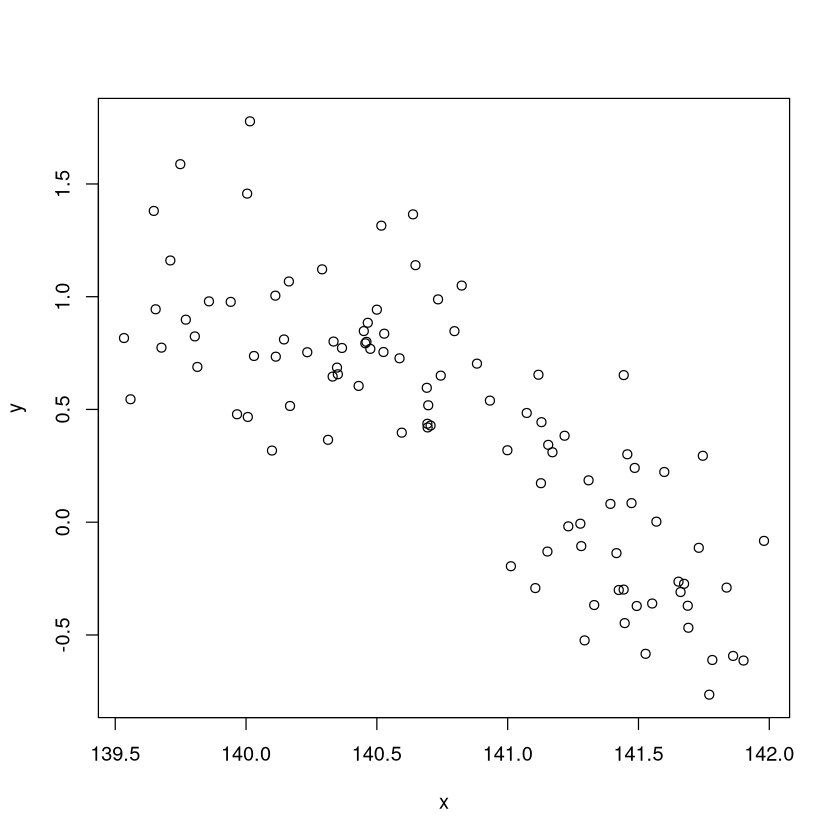

In [1]:
load('7.R.RData')
plot(x,y)

In [2]:
fit <- lm(y ~ x)
cat("Slope coefficient:", coef(fit)[2], "\n")

Slope coefficient: -0.6748303 


## R2
For the model $y ~ 1 + x + x^2$, what is the coefficient of $x$ (within 10%)?

In [3]:
fit <- lm(y ~ 1 + x + I(x^2))
cat("Coefficient of x:", coef(fit)[2], "\n")

Coefficient of x: 77.70751 


## Chapter 7 Quiz

### Q1
Suppose we want to fit a generalized additive model (with a continuous response) for $y$ agains $X_1$ and $X_2$. Suppose we are using a cubic spline with four knots for each variable (so our model can be expressed as a linear regression after the right basis expansion).  

Suppose that we fit our model by following three steps:  
1. First fit our cubic spline model for $y$ against $X_1$, obtaining the fit $\hat{f}_1(x)$ and residuals $r_i = y_i - \hat{f}_1(X_{i,1})$
2. Then, fit a cubic spline model for $r$ against $X_2$ to obtain $\hat{f}_2(x)$.
3. Finally construct fitted values $\hat{y}_i = \hat{f}_1(X_{i,1}) + \hat{f}_2(X_{i,2})$.
Will we get the same fitted values as we would if we fit the additive model for $y$ against $X_1$ and $X_2$ jointly?

1. yes, no matter what
2. only if $X_1$ and $X_2$ are uncorrelated
3. not necessarily, even if $X_1$ and $X_2$ are uncorrelated.

Answer: 3  
If $X_1$ and $X_2$ are uncorrelated, and we are only fitting a linear regression (only linear terms for $X_1 X_2$) then this method would work. However, even if $X_1$ and $X_2$ are uncorrelated, the nonlinear basis functions might be.